<a href="https://colab.research.google.com/github/ArchoCode/colabTest/blob/main/comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

Installing Emoji Package

In [ ]:
!pip install -U -q emoji

In [3]:
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as sm
import re
import emoji
import nltk
nltk.download('punkt')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Import Dataset

In [46]:
data_set= pd.read_csv('/content/dataset.csv')

# Pre-Processing

In [ ]:
def clean_text(df, text_field,new_text_field):
    df[new_text_field]=df[text_field]
    # remove numbers
    df[new_text_field] = df[new_text_field].apply(lambda elem: re.sub(r"\d+", "", elem))
    #remove url
    df[new_text_field] = df[new_text_field].apply(lambda elem: re.sub(r"https?://\S+|www\.\S+", "", elem))
    #remove HTML tags
    df[new_text_field] = df[new_text_field].apply(lambda elem: re.sub(r"<.*?>", "", elem))
    #remove emojis 
    df[new_text_field] = df[new_text_field].apply(lambda elem: emoji.get_emoji_regexp().sub(r" ", elem))
    #remove re-tweets status 
    df[new_text_field] = df[new_text_field].apply(lambda elem: re.sub(r'^RT @\w*: ', ' ', elem))
    #remove mentions 
    df[new_text_field] = df[new_text_field].apply(lambda elem: re.sub(r'@\w*', ' ', elem))
    #remove special characters 
    df[new_text_field] = df[new_text_field].apply(lambda elem: re.sub(r'[!@#&*$.?,]', ' ', elem))
    #remove \n
    df[new_text_field] = df[new_text_field].apply(lambda elem: re.sub(r'\n', ' ', elem))
    #remove ''
    df[new_text_field] = df[new_text_field].apply(lambda elem: re.sub("'", '', elem))
    
    return df

#tokenizing
def tokenize(df,text_field,new_text_field):
  df[new_text_field]=df[text_field]
  df[new_text_field]=df[new_text_field].apply(word_tokenize)
  return df
    
clean_data = clean_text(data_set,'Comment','text_clean')
tokenize_data=tokenize(data_set,'text_clean','tokenized_text')
clean_data.head()

# Train & Test Split

In [48]:
# extract the labels from the train data
y = data_set.label.values

# use 70% for the training and 30% for the test
x_train, x_test, y_train, y_test = train_test_split(data_set.text_clean.values, y, 
                                                    stratify=y, 
                                                    random_state=1, 
                                                    test_size=0.3, shuffle=True)

# Vectorization

Tf-idf vectorizer

In [ ]:
Tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),analyzer='word')
Tfidf_vectorizer.fit(list(x_train) + list(x_test))

In [37]:

# transform documents to document-term matrix transform comments into a vector/numerical form
x_train_vec = Tfidf_vectorizer.transform(x_train)
x_test_vec = Tfidf_vectorizer.transform(x_test)

Counter Vectorizer

In [ ]:
# vectorize tweets for model building
counter_vectorizer = CountVectorizer(binary=True)

# learn a vocabulary dictionary of all tokens in the raw documents
counter_vectorizer.fit(list(x_train) + list(x_test))

In [50]:
# transform documents to document-term matrix
x_train_vec = counter_vectorizer.transform(x_train)
x_test_vec = counter_vectorizer.transform(x_test)

# Model Building

01) linear SVM Classifier

---



In [51]:
# linear SVM Classifier
from sklearn import svm
# classify using support vector classifier
model = svm.SVC(kernel = 'linear', probability=True)
# fit the SVC model based on the given training data
probability = model.fit(x_train_vec, y_train).predict_proba(x_test_vec)
# perform classification and prediction on samples in x_test
prediction = model.predict(x_test_vec)

Performance Messure *SVM*

In [ ]:
print("Accuracy score for SVM is: ", accuracy_score(y_test, prediction) * 100, '%')
print("Precision score for SVM is: ", precision_score(y_test, prediction, pos_label=1) * 100, '%')
print("Recall score for SVM is: ", recall_score(y_test, prediction, pos_label=1) * 100, '%')
print("f1 score for SVM is: ", f1_score(y_test, prediction) * 100, '%')

02) Multinomial naive bayes classifier

---



In [53]:
#multinominal naive bayes classifier
model = MultinomialNB()
probability = model.fit(x_train_vec,y_train).predict_proba(x_test_vec)
prediction = model.predict(x_test_vec)

In [ ]:
print("Accuracy score for MNB is: ", accuracy_score(y_test, prediction) * 100, '%')
print("Precision score for MNB is: ", precision_score(y_test, prediction, pos_label=1) * 100, '%')
print("Recall score for MNB is: ", recall_score(y_test, prediction, pos_label=1) * 100, '%')
print("f1 score for MNB is: ", f1_score(y_test, prediction) * 100, '%')

In [ ]:
#model.score(x_test_vec,y_test)
#model.predict_proba(x_test_vec[0:1])

03) KNN

---



Maximum accuracy:- 0.6521739130434783 at K = 20


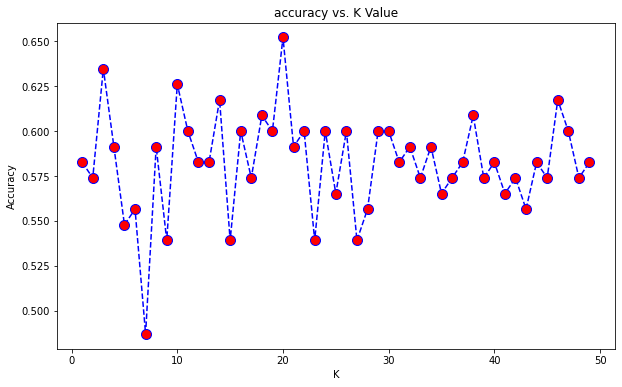

In [55]:
accuracy = []
# Will take some time
#from sklearn import metrics
for k in range(1,50):
    model = KNeighborsClassifier(n_neighbors = k).fit(x_train_vec,y_train)
    prediction = model.predict(x_test_vec)
    accuracy.append(sm.accuracy_score(y_test, prediction))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),accuracy,color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

print("Maximum accuracy:-",max(accuracy),"at K =",accuracy.index(max(accuracy))+1)

Performance messure at *k* value which gives the max accuracy 



In [ ]:
k = 20
model = KNeighborsClassifier(n_neighbors = k).fit(x_train_vec,y_train)
#probability = model.fit(x_train_vec,y_train).predict_proba(x_test_vec)
prediction = model.predict(x_test_vec)
print("Accuracy score for KNN is: ", sm.accuracy_score(y_test, prediction) * 100, '%')
print("Precision score for KNN is: ", precision_score(y_test, prediction, pos_label=1) * 100, '%')
print("Recall score for KNN is: ", recall_score(y_test, prediction, pos_label=1) * 100, '%')
print("f1 score for KNN is: ", f1_score(y_test, prediction) * 100, '%')

04) Decision trees

---



In [ ]:
model =DecisionTreeClassifier()
probability = model.fit(x_train_vec,y_train).predict_proba(x_test_vec)
prediction = model.predict(x_test_vec)
print("Accuracy score for DT is: ", sm.accuracy_score(y_test, prediction) * 100, '%')
print("Precision score for DT is: ", precision_score(y_test, prediction, pos_label=1) * 100, '%')
print("Recall score for DT is: ", recall_score(y_test, prediction, pos_label=1) * 100, '%')
print("f1 score for DT is: ", f1_score(y_test, prediction) * 100, '%')

05)RandomForest Classifier

---



In [ ]:
model = RandomForestClassifier()
probability = model.fit(x_train_vec,y_train).predict_proba(x_test_vec)
prediction = model.predict(x_test_vec)
print("Accuracy score for RF is: ", sm.accuracy_score(y_test, prediction) * 100, '%')
print("Precision score for RF is: ", precision_score(y_test, prediction, pos_label=1) * 100, '%')
print("Recall score for RF is: ", recall_score(y_test, prediction, pos_label=1) * 100, '%')
print("f1 score for RF is: ", f1_score(y_test, prediction) * 100, '%')